In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Para formatação dos eixos, se necessário


In [2]:
# Exemplo de valores (pode ser substituído por input do usuário)
f_str_exemplo = str('2*x*y')
x_exemplo = 1
y_exemplo = 2
h_exemplo = 0.1
# Ajustando o número de iterações para corresponder à imagem de exemplo, se desejado.
# A imagem mostra 27 iterações após o ponto inicial (Iter. 0 a Iter. 27)
interacoes_exemplo = 27

In [3]:

def resolver_edo_ponto_medio(f_str, x_inicial, y_inicial, h_passo, num_total_iteracoes):
    """
    Resolve uma EDO de primeira ordem dy/dx = f(x,y) usando o método do Ponto Médio.

    Args:
        f_str (str): A equação dy/dx = f(x,y) como string.
        x_inicial (float/int): Valor inicial de x (x0).
        y_inicial (float/int): Valor inicial de y (y0).
        h_passo (float/int): Tamanho do passo (h).
        num_total_iteracoes (int): Número de iterações a serem calculadas APÓS o ponto inicial.
                                     (Ex: 10 iterações resultará em 11 linhas, de Iter. 0 a Iter. 10)

    Returns:
        tuple: Contendo:
            - df (pd.DataFrame): DataFrame com os resultados das iterações.
            - equacao_info (str): String descrevendo a equação fornecida.
            - condicoes_info (str): String descrevendo as condições iniciais.
            - passo_info (str): String descrevendo o passo h.
            - num_iteracoes_info (str): String descrevendo o número de iterações.
        Retorna (None, error_message, None, None, None) em caso de erro na conversão
        de input ou na interpretação da função.
    """

    try:
        x0_global = float(x_inicial)
        y0_global = float(y_inicial)
        h = float(h_passo)
        num_iteracoes = int(num_total_iteracoes)
    except ValueError:
        error_msg = "Erro: Entrada inválida. Certifique-se de que os valores numéricos (x_inicial, y_inicial, h_passo, num_total_iteracoes) estão corretos."
        return None, error_msg, None, None, None

    # Tenta criar a função a partir da string de entrada
    try:
        allowed_names = {"x": None, "y": None, "math": math}

        def func(x_eval, y_eval):
            return eval(f_str, {"__builtins__": {}}, {**allowed_names, "x": x_eval, "y": y_eval})
        # Teste inicial da função
        func(x0_global, y0_global)
    except Exception as e:
        error_msg = f"Erro ao interpretar a função f(x,y) ('{f_str}'): {e}\n" \
            "Certifique-se de que a equação usa 'x' e 'y' como variáveis.\n" \
            "Para funções matemáticas, use o prefixo 'math.', por exemplo, 'math.sin(x)'."
        return None, error_msg, None, None, None

    # Preparando as strings de informação para retorno
    equacao_info = f"Equação fornecida: dy/dx = {f_str}"
    condicoes_info = f"Condições iniciais: x0 = {x0_global}, y0 = {y0_global}"
    passo_info = f"Passo (h): {h}"
    # O número de iterações é o número de *passos* após o inicial.
    # Se num_iteracoes = 10, teremos Iter. 0, Iter. 1, ..., Iter. 10 (11 linhas)
    num_iteracoes_info = f"Número de iterações após o ponto inicial: {num_iteracoes}"


    # Inicialização das listas para armazenar os dados para o DataFrame
    # Estas listas vão armazenar os valores de x_i, y_i, k1_i, k2_i, erro_i para cada linha da tabela
    iter_col = []
    x_col = [] # Coluna 'x0' da imagem, representa o x no início do intervalo i
    y_col = [] # Coluna 'y0' da imagem, representa o y no início do intervalo i
    k1_col = []
    k2_col = []
    erro_col = []

    # Valores atuais para o loop
    x_i = x0_global
    y_i = y0_global

    # Iteração 0 (ponto inicial)
    iter_col.append(0)
    x_col.append(x_i)
    y_col.append(y_i)

    k1_val = func(x_i, y_i)
    k1_col.append(k1_val)

    k2_val = func(x_i + h / 2, y_i + (h / 2) * k1_val)
    k2_col.append(k2_val)
    erro_col.append(float('nan')) # Erro não definido para a primeira iteração

    # Loop para as iterações seguintes
    # Se num_total_iteracoes = N, o loop vai de 1 até N.
    # Isso resultará em N+1 linhas no total (Iter. 0 até Iter. N)
    for i in range(1, num_iteracoes + 1):
        y_anterior = y_i # y_i da iteração anterior (y_{n-1})

        # y_{i+1} = y_i + h * k2 (onde k2 foi calculado usando x_i, y_i da iteração anterior)
        # No nosso caso, k2_val é o k2 da linha anterior da tabela
        y_i = y_i + h * k2_val # Este é o novo y_{n}

        # x_i é atualizado
        x_i = x0_global + i * h # Este é o novo x_{n}

        iter_col.append(i)
        x_col.append(x_i)
        y_col.append(y_i) # y_i calculado para esta iteração

        # Calcula k1 e k2 para ESTA iteração (x_i, y_i atuais)
        # Estes k1, k2 serão usados para calcular o y da PRÓXIMA iteração
        k1_val = func(x_i, y_i)
        k1_col.append(k1_val)

        k2_val = func(x_i + h / 2, y_i + (h / 2) * k1_val)
        k2_col.append(k2_val)

        erro_val = abs(y_i - y_anterior)
        erro_col.append(erro_val)

    # Criação do DataFrame do Pandas
    # As colunas são nomeadas para corresponder à imagem fornecida
    df = pd.DataFrame({
        'Iter.': iter_col,
        'x0': x_col,
        'y0': y_col,
        'K1': k1_col,
        'K2': k2_col,
        'ERRO |yn-yn-1|': erro_col
    })

    return df, equacao_info, condicoes_info, passo_info, num_iteracoes_info


In [4]:


def gerar_grafico_edo_ponto_medio(df_resultados, titulo_grafico="Solução da EDO pelo Método do Ponto Médio"):
    """
    Gera e exibe um gráfico da solução da EDO (y0 vs x0) e do erro
    (|yn - y_{n-1}| vs x0) a partir de um DataFrame.

    Args:
        df_resultados (pd.DataFrame): DataFrame com os resultados das iterações.
                                      Deve conter as colunas 'x0', 'y0', e 'ERRO |yn-yn-1|'.
        titulo_grafico (str, optional): Título do gráfico.
    """
    if not isinstance(df_resultados, pd.DataFrame):
        print("Erro: A entrada deve ser um DataFrame do Pandas.")
        return
    # Ajuste nos nomes das colunas para corresponder ao DataFrame do Ponto Médio
    required_cols = {'x0', 'y0', 'ERRO |yn-yn-1|'}
    if not required_cols.issubset(df_resultados.columns):
        print(
            f"Erro: O DataFrame deve conter as colunas {required_cols}.")
        return
    if df_resultados.empty:
        print("Erro: O DataFrame está vazio, nada para plotar.")
        return

    plt.figure(figsize=(12, 7))

    # 1. Plota y0 versus x0 (a solução principal)
    plt.plot(df_resultados['x0'], df_resultados['y0'], marker='o',
             linestyle='-', color='green', label='$y_n$ (Solução Ponto Médio)')

    # 2. Plota |yn - y_{n-1}| versus x0
    plt.plot(df_resultados['x0'], df_resultados['ERRO |yn-yn-1|'], marker='s',
             linestyle='--', color='purple', label='$|y_n - y_{n-1}|$ (Erro Aproximado)')

    plt.title(titulo_grafico, fontsize=16)
    plt.xlabel("$x_n$", fontsize=14)
    plt.ylabel("Valores", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    # plt.show() # Descomente para exibir o gráfico automaticamente
    return plt



In [5]:

# --- Exemplo de uso do método do Ponto Médio ---
dataframe_pm, eq_info_pm, ci_info_pm, p_info_pm, ni_info_pm = resolver_edo_ponto_medio(
    f_str_exemplo,
    x_exemplo,
    y_exemplo,
    h_exemplo,
    interacoes_exemplo
)


Solução de EDO pelo Método do Ponto Médio
-----------------------------------------
Equação fornecida: dy/dx = 2*x*y
Condições iniciais: x0 = 1.0, y0 = 2.0
Passo (h): 0.1
Número de iterações após o ponto inicial: 27
-----------------------------------------

Resultados das Iterações:
 Iter.     x0          y0           K1           K2 ERRO |yn-yn-1|
     0 1.0000      2.0000       4.0000       4.6200            NaN
     1 1.1000      2.4620       5.4164       6.2855         0.4620
     2 1.2000      3.0905       7.4173       8.6535         0.6285
     3 1.3000      3.9559      10.2853      12.0695         0.8654
     4 1.4000      5.1628      14.4560      17.0684         1.2069
     5 1.5000      6.8697      20.6091      24.4904         1.7068
     6 1.6000      9.3187      29.8199      35.6721         2.4490
     7 1.7000     12.8859      43.8122      52.7679         3.5672
     8 1.8000     18.1627      65.3858      79.2985         5.2768
     9 1.9000     26.0926      99.1518     12

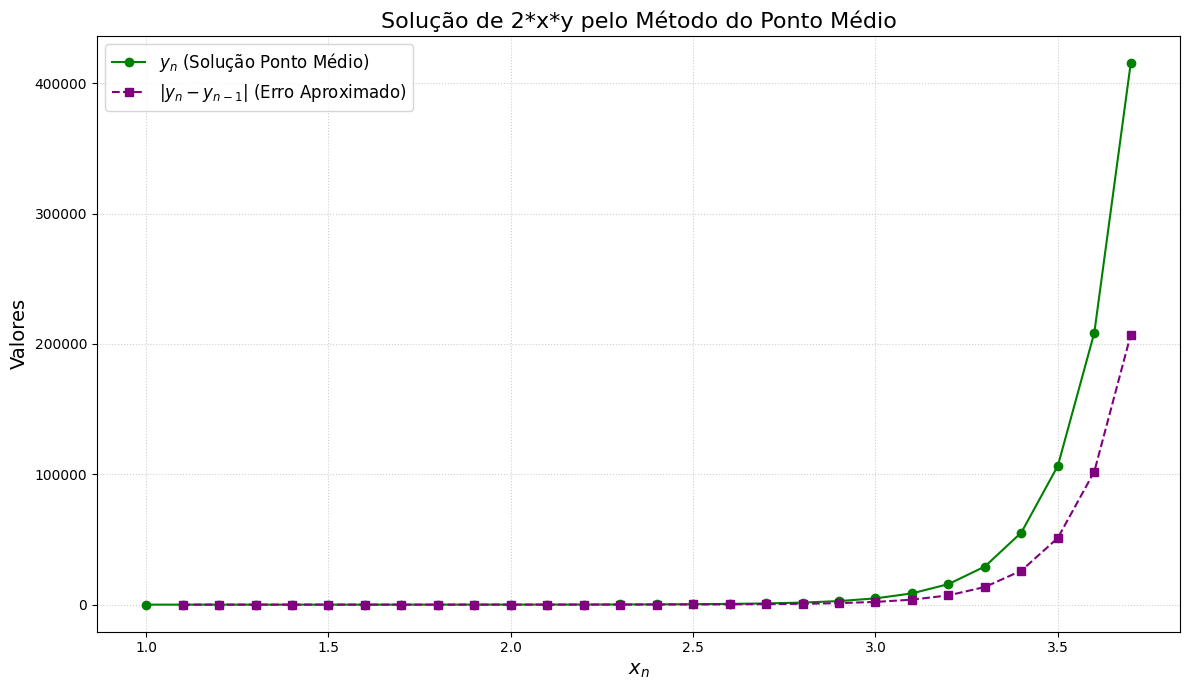

In [7]:

if dataframe_pm is not None:
    print("Solução de EDO pelo Método do Ponto Médio")
    print("-----------------------------------------")
    print(eq_info_pm)
    print(ci_info_pm)
    print(p_info_pm)
    print(ni_info_pm)
    print("-----------------------------------------\n")
    print("Resultados das Iterações:")

    # Configurando o formato de exibição do Pandas para corresponder à imagem
    formatters = {
        'x0': '{:.4f}'.format,
        'y0': '{:.4f}'.format,
        'K1': '{:.4f}'.format,
        'K2': '{:.4f}'.format,
        'ERRO |yn-yn-1|': '{:.4f}'.format
    }

    # Usando formatters para controle por coluna:
    print(dataframe_pm.to_string(index=False, na_rep='NaN', formatters=formatters))

    # Gerar e exibir o gráfico
    grafico_pm = gerar_grafico_edo_ponto_medio(
        dataframe_pm, titulo_grafico=f"Solução de {f_str_exemplo} pelo Método do Ponto Médio"
    )
    # Para exibir o gráfico em ambientes que não o fazem automaticamente (ex: scripts):
    # grafico_pm.show() # Descomente se quiser que o script pause e mostre o gráfico
    print("\nGráfico gerado (descomente plt.show() na função ou aqui para exibir).")

else:
    # 'eq_info_pm' conteria a mensagem de erro neste caso
    print(f"Não foi possível calcular a solução: {eq_info_pm}")

print("\n--- Exemplo com erro na equação (Ponto Médio) ---")
dataframe_erro_pm, msg_erro_pm, _, _, _ = resolver_edo_ponto_medio(
    "2*x*z",  # Equação com variável 'z' não definida
    1, 2, 0.1, 5
)

In [8]:
dataframe_pm

,Iter.,x0,y0,K1,K2,ERRO |yn-yn-1|
0,0,1.0,2.000000,4.000000e+00,4.620000e+00,NaN
1,1,1.1,2.462000,5.416400e+00,6.285486e+00,0.462000
2,2,1.2,3.090549,7.417317e+00,8.653536e+00,0.628549
3,3,1.3,3.955902,1.028535e+01,1.206946e+01,0.865354
4,4,1.4,5.162848,1.445597e+01,1.706838e+01,1.206946
5,5,1.5,6.869686,2.060906e+01,2.449043e+01,1.706838
6,6,1.6,9.318728,2.981993e+01,3.567209e+01,2.449043
7,7,1.7,12.885938,4.381219e+01,5.276791e+01,3.567209
8,8,1.8,18.162729,6.538582e+01,7.929848e+01,5.276791
9,9,1.9,26.092577,9.915179e+01,1.210956e+02,7.929848
